In [1]:
import loica as lc
import matplotlib.pyplot as plt
import networkx as nx

# One strain alone

In [2]:
# create the first strain
node_1 = lc.GeneticNetwork()

# add regulators
c4_reg = lc.Regulator(name='C4', degradation_rate=1, init_concentration=100)
scb2_reg = lc.Regulator(name='SCB2', degradation_rate=1)
laci_reg = lc.Regulator(name='LacI', degradation_rate=1)

node_1.add_regulator([c4_reg, scb2_reg, laci_reg])

# add reporters
mcherry_rep = lc.Reporter(name='mCherry', degradation_rate=1, color='red')
node_1.add_reporter(mcherry_rep)

# add operators
c4_laci = lc.Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci_reg, output=[scb2_reg, mcherry_rep], alpha=[10000,0.1], K=10, n=2)

node_1.add_operator([c4_laci, laci_not_scb2])

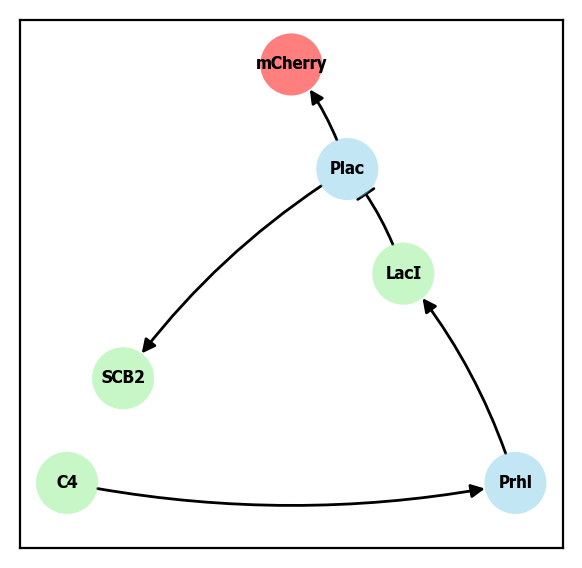

In [3]:
plt.figure(figsize=(3.5,3.5), dpi=200)
node_1.draw(pos=nx.planar_layout)

In [ ]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 0.5)

metab = lc.SimulatedMetabolism("Simulated metabolism", biomass, growth_rate)

In [ ]:
sample = lc.Sample(genetic_network=node_1, 
                    metabolism=metab)

assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.1,
              name=f'mCherry expression from node 1',
              description='Simulated RFP expression fro node 1 generated by loica'
             )

Stochastic simulation

In [ ]:
assay.run(stochastic=True)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be remove

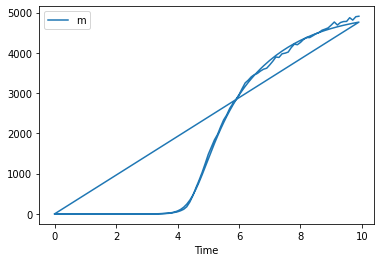

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend('mCherry')

ODE simulation

In [ ]:
assay.run(stochastic=False)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be remove

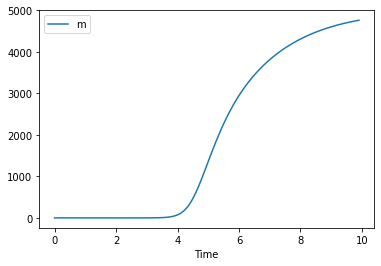

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend('mCherry')

# Three-strain repressilator

The cell below shows code for when new functionality will be added

In [ ]:
# create strains
# TODO: make a loop for this
node_1 = lc.GeneticNetwork()
node_2 = lc.GeneticNetwork()
node_3 = lc.GeneticNetwork()

# add regulators. All apart from LacI are diffusible
c4_reg = lc.Regulator(name='C4', degradation_rate=1, diffusion_rate=1)
scb2_reg = lc.Regulator(name='SCB2', degradation_rate=1, diffusion_rate=1)
c14_reg = lc.Regulator(name='C14', degradation_rate=1, diffusion_rate=1)
laci_reg = lc.Regulator(name='LacI', degradation_rate=1)

c4_reg2 = lc.Regulator(name='C4', degradation_rate=1, diffusion_rate=1)
scb2_reg2 = lc.Regulator(name='SCB2', degradation_rate=1, diffusion_rate=1)
c14_reg2 = lc.Regulator(name='C14', degradation_rate=1, diffusion_rate=1)
laci_reg2 = lc.Regulator(name='LacI', degradation_rate=1)

laci_reg3 = lc.Regulator(name='LacI', degradation_rate=1)

# add regulators to nodes
node_1.add_regulator([c4_reg, scb2_reg, laci_reg])
node_2.add_regulator([scb2_reg2, c14_reg, laci_reg2])
node_3.add_regulator([c14_reg2, c4_reg2, laci_reg3])

# add reporters
mcherry_rep = lc.Reporter(name='mCherry', degradation_rate=1, color='red')
cyan_rep = lc.Reporter(name='CFP', degradation_rate=1, color='blue')
mven_rep = lc.Reporter(name='mVenus', degradation_rate=1, color='yellow')

# add reporters to nodes
node_1.add_reporter(mcherry_rep)
node_2.add_reporter(cyan_rep)
node_3.add_reporter(mven_rep)

# add operators
# node 1
c4_laci = lc.Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci_reg, output=[scb2_reg, mcherry_rep], alpha=[10000,0.1], K=10, n=2)
node_1.add_operator([c4_laci, laci_not_scb2])

# node 2
scb2_laci = lc.Hill1(name='Pscb', input=scb2_reg2, output=laci_reg2, alpha=[0.1, 10000], K=10, n=2)
laci_not_c14 = lc.Hill1(name='Plac', input=laci_reg2, output=[c14_reg, cyan_rep], alpha=[10000,0.1], K=10, n=2)
node_2.add_operator([scb2_laci, laci_not_c14])

# node 3
c14_laci = lc.Hill1(name='Pcin', input=c14_reg2, output=laci_reg3, alpha=[0.1, 10000], K=10, n=2)
laci_not_c4 = lc.Hill1(name='Plac', input=laci_reg3, output=[c4_reg2, mven_rep], alpha=[10000,0.1], K=10, n=2)
node_3.add_operator([c14_laci, laci_not_c4])


In [ ]:
# create consortium
repr_cons = lc.Sample(strains=[node_1, node_2, node_3])
# added_c4 = lc.Supplement(name="C4", concentration=5)
# TODO: check if this is correct way to do it
# repr_cons.add_supplemen(added_c4)
# Do I need to add supplement as regulator?
# I need to add code to do stochastic simulation so I could work further on this

In [9]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 0.5)

metab = lc.SimulatedMetabolism("Simulated metabolism", biomass, growth_rate)

In [18]:
import numpy as np
list = [[1, 2], [1, 2], [1, 2], [1, 2]]
a = np.array(list)
for i in a:
    print(i)

[1 2]
[1 2]
[1 2]
[1 2]


In [ ]:
sample = lc.Sample(genetic_network=[node_1, node_2, node_3], 
                    metabolism=metab)

assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.1,
              name=f'Fluorescence measurements from repressilator consortium',
              description='Simulated fluorescent protein expression in repressilator consortium'
             )

### Stochastic simulation

In [13]:
assay.run(stochastic=True)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be remove

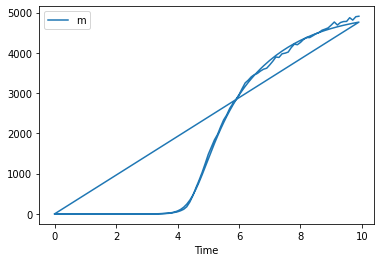

In [14]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='mVenus'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend(['mCherry', 'CFP', 'mVenus', 'OD'])

### ODE simulation

In [11]:
assay.run(stochastic=False)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be remove

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='mVenus'].plot(x='Time', y='Measurement', style='-', ax=ax)
m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend(['mCherry', 'CFP', 'mVenus', 'OD'])

In [ ]:


# I also want to be able to draw consortium - similar to GeneticNetwork.draw()
# the graph would look similar in a way - there would be strains and molecules they produce
# so the same as in consortium.ipynb 